In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import json
from sklearn.cluster import DBSCAN, AgglomerativeClustering, KMeans
from sklearn.metrics import pairwise_distances
sns.set(style="whitegrid")

In [4]:
from DataProvider import DataProvider
from Visualizer import Visualizer
from Clusterer import Clusterer
from ClustererAgg import ClustererAgg

In [10]:
hamburg="test-data/27_teams_3ce786ba.json"
mainz_alt="test-data/36_teams_5a005256.json"
mainz_complete="test-data/45_teams_b17d628f.json"

data = DataProvider(hamburg)
routes = data.get_routes()
dist_matrix = data.get_distance_matrix()

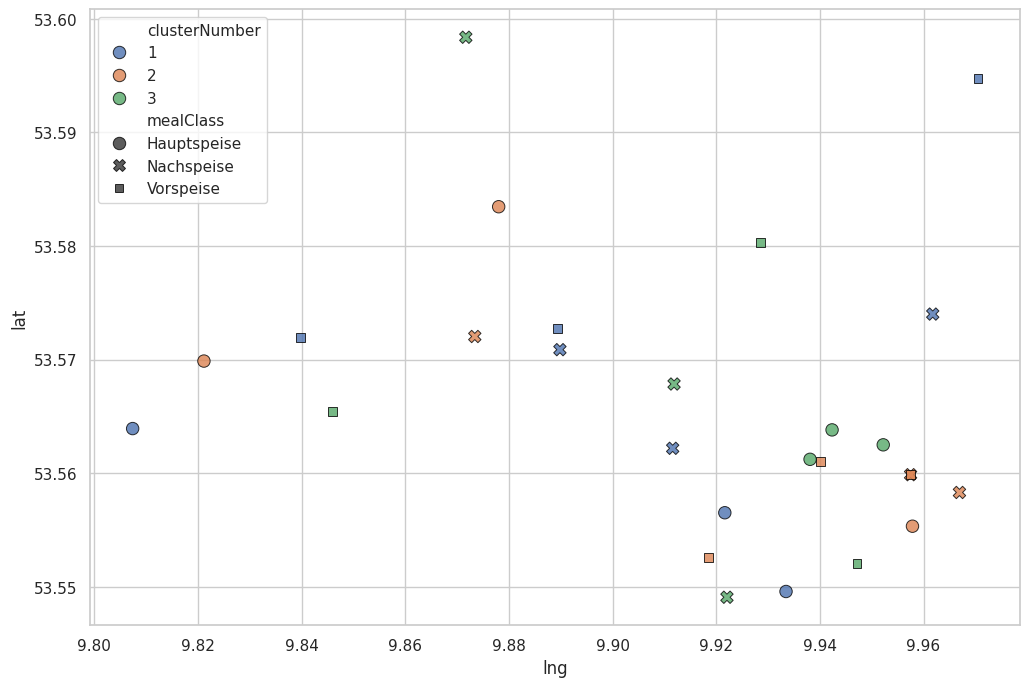

In [11]:
vis = Visualizer(routes, dist_matrix)
vis.plot_geocodes()

In [12]:
dist_percentiles = data.get_distance_percentiles()
print(dist_percentiles)

{50: np.float64(4209.4469018844575), 70: np.float64(6428.334001638435), 75: np.float64(7024.032049357544), 80: np.float64(7412.4480552688265), 90: np.float64(9279.532467605644), 95: np.float64(10527.747273313078), 99: np.float64(12186.41352553413)}


In [20]:
#n_clusters=3
#distance_threshold=7000
##distance_threshold=1000
agg_cluster = ClustererAgg(routes, dist_matrix, data.get_cluster_sizes())
agg_routes, agg_labels = agg_cluster.predict(n_clusters=len(data.get_cluster_sizes()))#distance_threshold=dist_percentiles[80])
max_distances_map = agg_cluster.print_max_distances_per_cluster(agg_routes)

Cluster 0: 9 Elemente, maximale Distanz: 6880.87
Cluster 1: 17 Elemente, maximale Distanz: 4591.81
Cluster 2: nur 1 Element


In [14]:
vis_agg = Visualizer(agg_routes, dist_matrix)

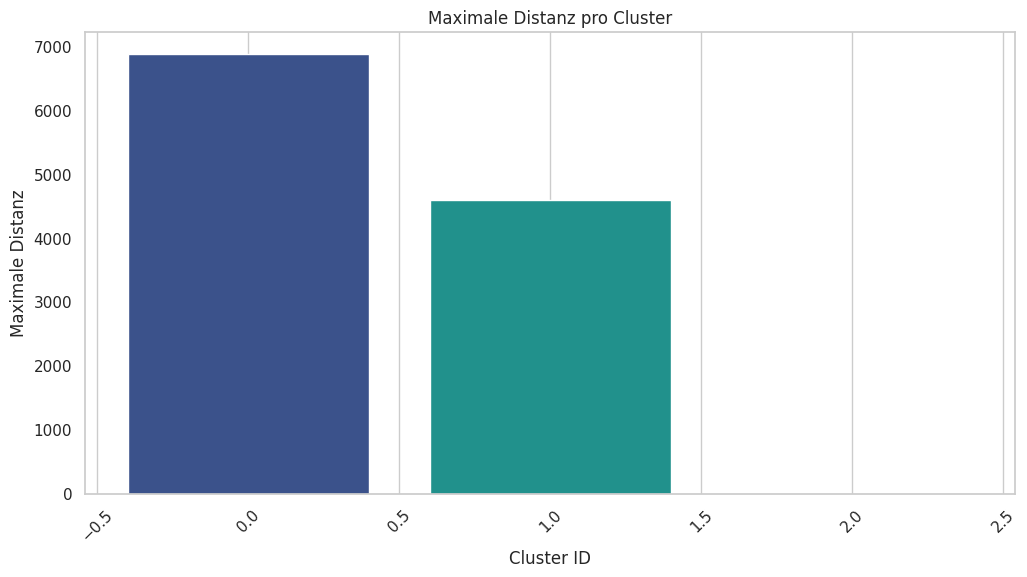

In [15]:
vis_agg.plot_max_distances_per_cluster(max_distances_map)

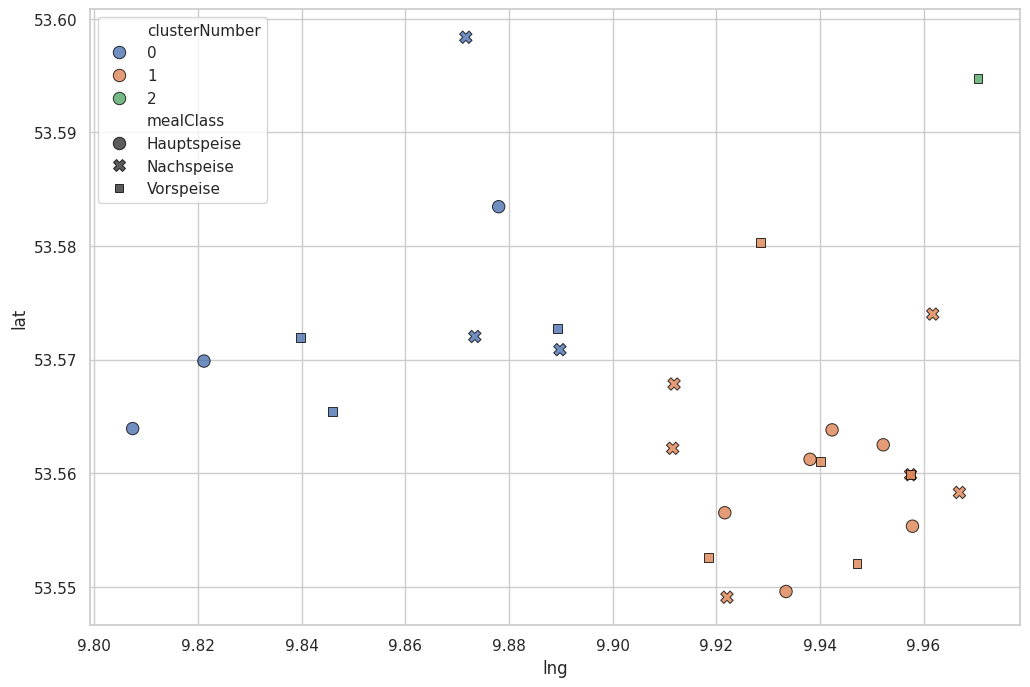

In [19]:
vis_agg.plot_geocodes()